# Use NAG Python Library to cluster some random data using K-means (g03eff)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import sklearn.cluster as clus
from naginterfaces.library import mv 

Populating the interactive namespace from numpy and matplotlib


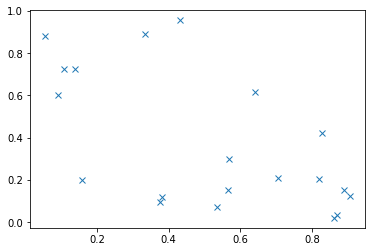

In [2]:
#generate a random array to try to cluster, have two variables so can plot it nicely
#np.random.seed(42)
n, m  = 20, 2
K = 2

X = np.random.rand(n,m)

plt.plot(X[:,0],X[:,1],'x')

In [3]:
isx = np.full(m,1.0,dtype=int)
nvar = isx.sum()
nvar

2

In [4]:
cmeans = np.random.rand(K,nvar)
kmeans = mv.cluster_kmeans(X,isx,cmeans,maxit=10)

In [18]:
kmeans.nic

array([14,  6])

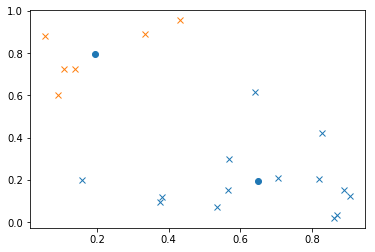

In [20]:
# probably a better way to plot the different clusters and centre points.
# To Do, would be nice to split the domain to show the separating line between clusters and even colour the background instead of the points.
cluster1 = np.zeros((kmeans.nic[0],m))
cluster2 = np.zeros((kmeans.nic[1],m))
x1, x2 = 0, 0
for i in range(0,n):
    if kmeans.inc[i] == 1:
        cluster1[x1,:] = X[i,:]
        x1=x1+1
    else:
        cluster2[x2,:] = X[i,:]
        x2=x2+1
plt.plot(cluster1[:,0],cluster1[:,1],'x')
plt.plot(cluster2[:,0],cluster2[:,1],'x')
plt.scatter(kmeans.cmeans[0,:],kmeans.cmeans[1,:])

## sklearn example of kmeans from their website

In [4]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.34s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.37s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.07s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


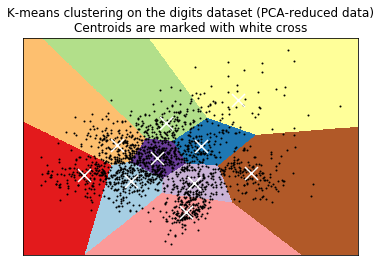

In [5]:
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()